In [1]:
from trace_functions import *
from softchirp_features import *

# Example run on 1 dataset
The code below runs the tracer and extract the featuers on one dataset from Sanjana's pups. 


In [3]:
folders = ["\\\\gpfs.corp.brain.mpg.de\\bark\\data\\2_Share\\SJ_and_DG\\data"]
all_files = find_all_text_files(folders, check_sub_folders=1)
file = all_files[0]

# this is an example for one file

# extract all calls
calls = load_calls(file, 1, ['S'], delimiter='\t')

# extract wav file
wav_data, samplerate = load_wav_file(file)

# get individual wav snippet and spectrogram per call
calls, freq = extract_spectrograms(calls, wav_data, samplerate, lowpass = 2000, highpass = 12000)

# create matrix the convolution step
max_fun= 7000 # maximum of the fundamental frequency
fun_fits_gauss = get_harmonics_matrix(freq, max_fun)

# extract the traces
calls =trace_call(calls, fun_fits_gauss)

# compute features
calls = compute_all_features(calls, samplerate, freq)

0 calls failed


Look at the spectrogram of a single call

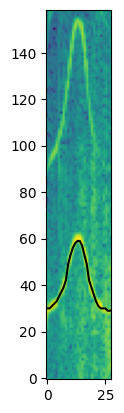

In [4]:
# example call
plt.imshow(calls['spectrogram'].iloc[0])
plt.plot(calls['final_trace'].iloc[0], color='black')
plt.gca().invert_yaxis()


Plot a scatter plot between two variables. Note: you can change the name under 'x' and 'y' to any of the column names to plot other variable

<Axes: xlabel='Frequency (Hz)', ylabel='Height (Hz)'>

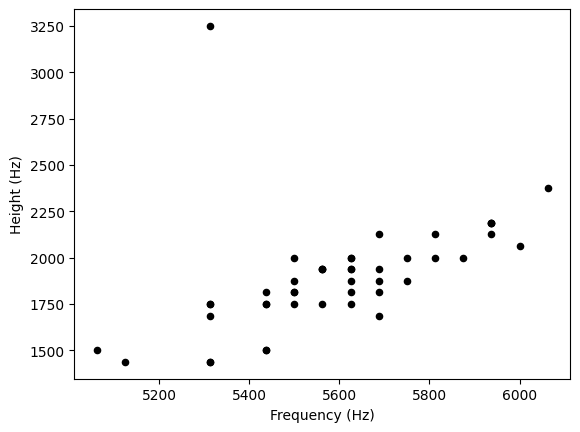

In [5]:
calls.plot.scatter(x='Frequency (Hz)',
                      y='Height (Hz)',
                      c='black')

### Run on multiple files at the same time
I use the folder name to extract the colony information for this data. 

In [6]:
folders = ["\\\\gpfs.corp.brain.mpg.de\\bark\\personal\\grijseelsd\\Data\\Hierarchy\\Chubbs\\20240105\\data",
           "\\\\gpfs.corp.brain.mpg.de\\bark\\personal\\grijseelsd\\Data\\Hierarchy\\Chubbs_mini\\20231122\\labels",
           "\\\\gpfs.corp.brain.mpg.de\\bark\\personal\\grijseelsd\\Data\\Hierarchy\\Baggings\\20240123"
           ]
all_files = find_all_text_files(folders, check_sub_folders=1)


In [ ]:
all_calls = []
for file in all_files:
    print(file)

    colony = file.split("\\")[8]

    # extract all calls
    calls = load_calls(file, 1, ['nan'], delimiter='\t')

    # extract wav file
    wav_data, samplerate = load_wav_file(file)

    # get individual wav snippet and spectrogram per call
    calls, freq = extract_spectrograms(calls, wav_data, samplerate, lowpass = 2000, highpass = 12000)

    # create matrix the convolution step
    max_fun= 7000 # maximum of the fundamental frequency
    fun_fits_gauss = get_harmonics_matrix(freq, max_fun)

    # extract the traces
    calls =trace_call(calls, fun_fits_gauss)

    # compute features
    calls = compute_all_features(calls, samplerate, freq)

    calls['Colony'] = colony
    all_calls.append(calls)

all_calls = pd.concat(all_calls, ignore_index=True)

\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Chubbs\20240105\data\blue_red.txt
2 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Chubbs\20240105\data\green_blue.txt
3 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Chubbs\20240105\data\green_purple.txt
0 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Chubbs\20240105\data\orange_blue.txt
0 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Chubbs\20240105\data\orange_green.txt
0 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Chubbs\20240105\data\purple_blue.txt
1 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Chubbs\20240105\data\purple_orange.txt
0 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Chubbs\20240105\data\red_green.txt
0 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\C

\\gpfs.corp.brain.mpg.de\bark\data\2_Share\Dori\code\trace_functions\trace_functions.py:77: UserWarning: Only one segment is calculated since parameter NFFT (=512) >= signal length (=0).
  [spec, freq, t, im] = plt.specgram(call_wav,Fs=samplerate, NFFT=512, noverlap=256)
c:\Users\door1\anaconda3\envs\sound_analysis\Lib\site-packages\matplotlib\axes\_axes.py:7944: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
\\gpfs.corp.brain.mpg.de\bark\data\2_Share\Dori\code\trace_functions\trace_functions.py:81: RuntimeWarning: divide by zero encountered in log
  spectrograms.append(np.log(spec[inc,:]))
\\gpfs.corp.brain.mpg.de\bark\data\2_Share\Dori\code\trace_functions\trace_functions.py:115: RuntimeWarning: invalid value encountered in subtract
  call = (spec - dfmin)/(dfmax - dfmin)
\\gpfs.corp.brain.mpg.de\bark\data\2_Share\Dori\code\trace_functions\trace_functions.py:115: RuntimeWarning: invalid value encountered in scalar subtract
  call = (spec - dfmin)/(dfma

303 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Baggings\20240123\lbred_pink_8830_9239.txt
8 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Baggings\20240123\lb_pink_8831_9228.txt
9 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Baggings\20240123\lb_redblue_8831_9237.txt
6 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Baggings\20240123\lb_yellow_8831_1619.txt
1 calls failed
\\gpfs.corp.brain.mpg.de\bark\personal\grijseelsd\Data\Hierarchy\Baggings\20240123\orange_blue_1618_9243.txt
8 calls failed


You can use the code below to save and load a dataset as csv. Note that csv is not the optimal way, but it allows easier view of the data in e.g. Excel. For long-term storage or sharing, pickle is preferable

In [19]:
# Save out data
all_calls.to_csv("all_calls.csv", index=False)  

# Load in data
all_calls = pd.read_csv('all_calls.csv')  

These are some examples of plots you can do with the information extracted with the tracer

<Axes: xlabel='Colony', ylabel='Frequency (Hz)'>

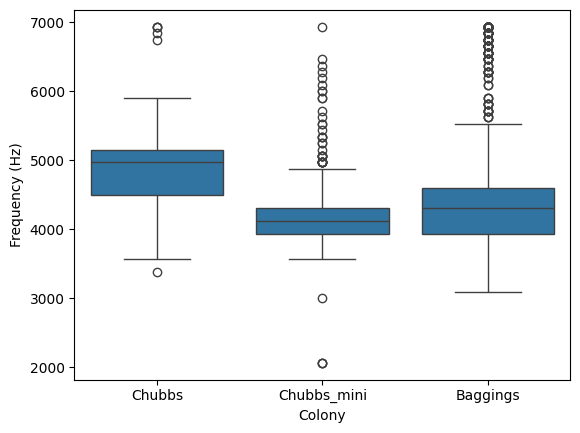

In [20]:
import seaborn as sns
sns.boxplot(data=all_calls, x="Colony", y="Frequency (Hz)")

<Axes: xlabel='Colony', ylabel='Asymmetry (Hz)'>

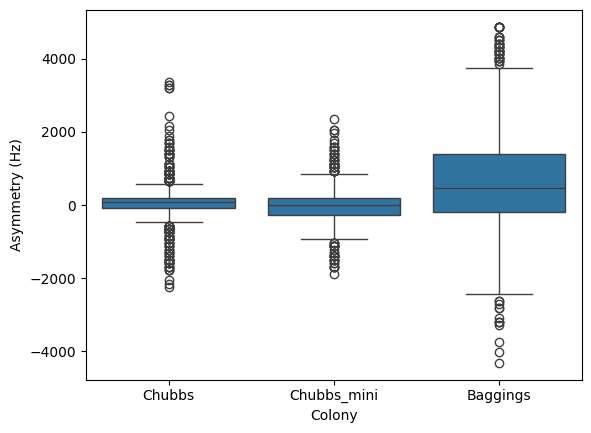

In [ ]:
sns.boxplot(data=all_calls, x="Colony", y="Asymmetry (Hz)")

## Random Forest classifier
The code below takes all the features and trains a random forest classifier to predict the colony from them. 

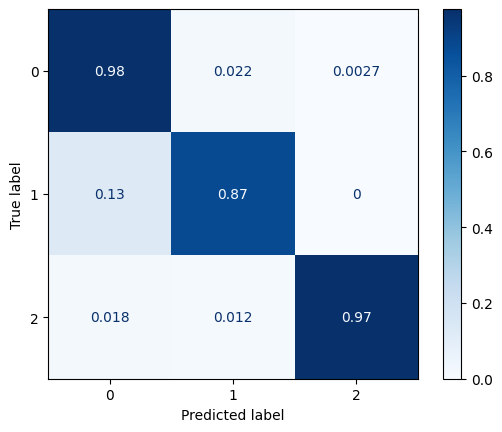

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

all_calls_temp = all_calls.drop(columns = ['call_type'])
all_calls_temp = all_calls_temp.dropna()
X = all_calls_temp.iloc[:,  9:-4]
y = all_calls_temp['Colony']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ConfusionMatrixDisplay(confusion_matrix=cmn).plot(cmap=plt.cm.Blues)